# SMS Spam Detection Project Overview
### This project focused on developing a machine learning model to accurately classify SMS messages as spam (unwanted messages) or ham (legitimate messages). The goal was to enhance user experience and security by effectively identifying and filtering out spam.



### In this Jupyter Notebook, a model is developed to classify email messages into two categories:
- **Legitimate Emails (commonly referred to as 'Ham')**: These are emails that the user has explicitly or implicitly indicated they wish to receive. They include personal communications, business correspondences, and subscribed newsletters.
- **Spam Emails (commonly known as 'Spam')**: These are unsolicited emails often sent in bulk. They range from benign advertisements to malicious emails containing scams or malware.

### The goal is to accurately identify and filter out Spam emails to improve user experience and enhance security.


## Objectives
- Perform exploratory data analysis.
- Prepare the dataset through preprocessing and feature engineering.
- Build a logistic regression model to classify messages.
- Evaluate the model using accuracy, precision, recall, and F1-score.
- Improve the model with cross-validation and parameter tuning.

In [1]:
# Importing dependencies libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the dataset.
spam_df = pd.read_csv('Resources/spam.csv', encoding='ISO-8859-1')
spam_df.head() # Display DataFrame

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Initial Data Inspection

### Checking number of columns, understanding the type of data each column holds, and looking for missing values.

In [3]:
# Review columns in dataset.
spam_df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
# Review datatypes.
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Look for any null values.
spam_df.isnull().any()

v1            False
v2            False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

In [6]:
# See total number of null values.
spam_df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

## Data Cleaning
### Remove unnecessary columns that mostly contain missing values.

In [7]:
# Data Cleaning: Remove unnecessary columns that mostly contain missing values.
# Rename columns for better readability.
spam_df = spam_df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
spam_df.columns = ['Label', 'Message']

## Distribution of Message Lengths by Label

This visualization depicts the distribution of message lengths categorized by their labels ('spam' and 'ham').

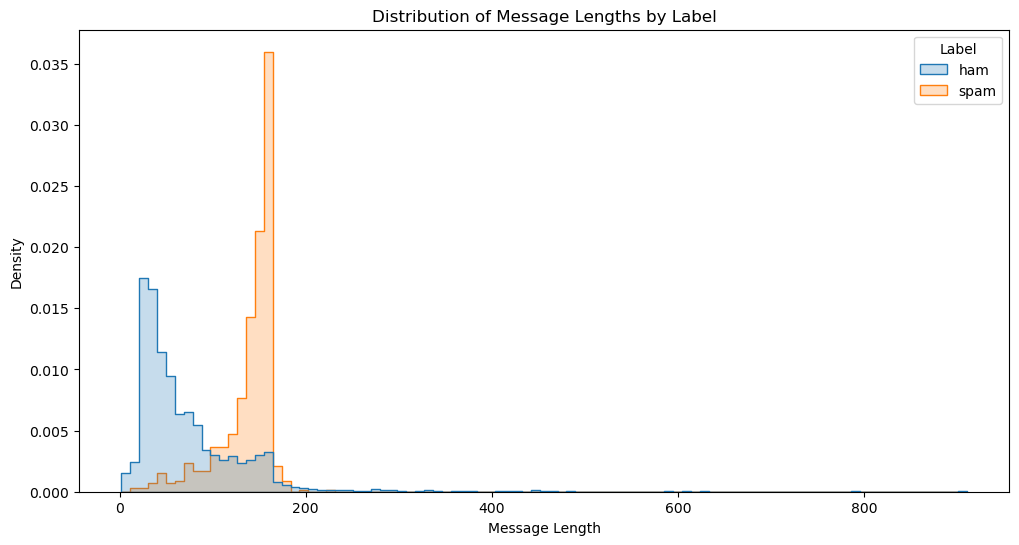

In [8]:
# Exploratory Data Analysis: Adding a new column for message length.
# Calculate the length of each message and store it in a new column in the dataframe.
spam_df['Message Length'] = spam_df['Message'].apply(len)

# Plotting the distribution of message lengths by label to visualize differences.
plt.figure(figsize=(12, 6))  # Set the size of the plot for better visibility.
sns.histplot(spam_df, x='Message Length', hue='Label', element='step', stat='density', common_norm=False)  # Create histogram with density instead of count to compare the distribution of 'ham' vs 'spam'.
plt.title('Distribution of Message Lengths by Label')  # Add a title to the plot.
plt.xlabel('Message Length')  # Label the x-axis as 'Message Length'.
plt.ylabel('Density')  # Label the y-axis as 'Density'.

plt.show()  # Display the plot.

## Distribution of Spam vs Ham Messages

This bar plot illustrates the count of spam versus ham messages in the dataset, providing insight into the class imbalance.

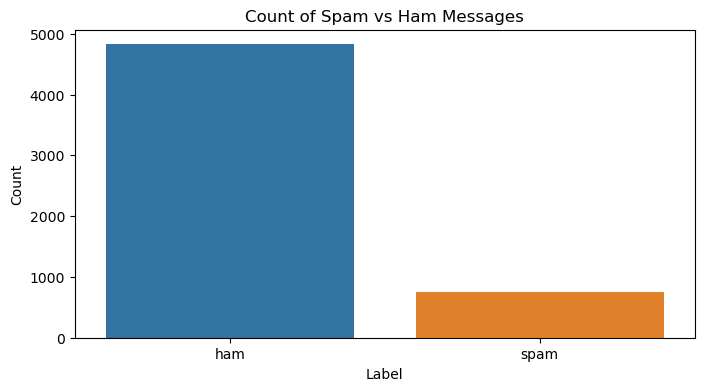

In [9]:
# Plot the distribution of spam versus ham messages to visualize the imbalance.
plt.figure(figsize=(8, 4))
label_counts = spam_df['Label'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Count of Spam vs Ham Messages')
plt.xlabel('Label') # X axis label
plt.ylabel('Count') # Y axis label
plt.show() # Show bar graph

In [10]:
# Feature Engineering: Use TF-IDF vectorization to transform text messages into a more usable form for machine learning.
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_tfidf = tfidf_vectorizer.fit_transform(spam_df['Message'])

In [11]:
# Preparing the target variable for model training.
y = spam_df['Label']

In [12]:
# Splitting the dataset into training and testing sets to ensure the model can be independently evaluated.
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

In [13]:
# Model Training: Using Logistic Regression due to its effectiveness with high-dimensional sparse data.
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
# Model Evaluation: Predicting the test data and evaluating accuracy and other metrics.
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [15]:
# Print out accuracy and detailed classification metrics to assess model performance.
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.9509569377990431
Confusion Matrix:
 [[1450    3]
 [  79  140]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1453
        spam       0.98      0.64      0.77       219

    accuracy                           0.95      1672
   macro avg       0.96      0.82      0.87      1672
weighted avg       0.95      0.95      0.95      1672



## Model Accuracy
### This number tells us how often the model makes the right prediction about whether a message is spam or not. An accuracy of 95.1% means that about 95 times out of 100, the model's prediction is correct.

In [16]:
print("Accuracy:", accuracy)

Accuracy: 0.9509569377990431


### Understanding the Confusion Matrix
The confusion matrix helps us see the errors made by the model:
- Top-left: Number of normal messages correctly identified.
- Top-right: Number of normal messages wrongly identified as spam.
- Bottom-left: Number of spam messages wrongly identified as normal.
- Bottom-right: Number of spam messages correctly identified.

For the model:
|       | Predicted Normal | Predicted Spam |
|-------|------------------|----------------|
| Actual Normal | 1450               | 3              |
| Actual Spam   | 79                 | 140            |


In [17]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1450    3]
 [  79  140]]


### Detailed Performance Analysis
The classification report gives us a deeper look at the model's performance for each type of message (normal and spam):
- Precision: Tells us how many of the messages we predicted to be in a category were actually in that category.
- Recall: Tells us how many of the messages that are actually in a category were predicted by us as being in that category.
- F1-Score: Combines precision and recall into a single number that gives a better overall view of the model's effectiveness.

For non-technical understanding:
- A higher precision means when we say a message is spam, it really is spam.
- A higher recall means we are catching a good portion of the spam messages.
- The F1-score helps us balance precision and recall, aiming for high numbers in both.


In [18]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1453
        spam       0.98      0.64      0.77       219

    accuracy                           0.95      1672
   macro avg       0.96      0.82      0.87      1672
weighted avg       0.95      0.95      0.95      1672



### Improvements (Cross-Validation and Parameter Tuning)

In [19]:
# Perform cross-validation to evaluate the effectiveness of the Logistic Regression model
scores = cross_val_score(LogisticRegression(max_iter=1000), X_tfidf, y, cv=5)  # Use 5-fold cross-validation to assess model stability and robustness.

print("Cross-validation scores:", scores)  # Print out the accuracy scores for each fold.
print("Average cross-validation score:", scores.mean())  # Calculate and print the average of these scores to get an overall idea of the model's performance.

# Parameter Tuning with Grid Search to find the best model parameters.
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}  # Define a grid of parameters to test.
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')  # Setup the grid search with 5-fold cross-validation.
grid_search.fit(X_tfidf, y)  # Fit the grid search model.

print("Best parameters:", grid_search.best_params_)  # Output the best parameters found via grid search.
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))  # Print the highest cross-validation score achieved.

Cross-validation scores: [0.96950673 0.9632287  0.96319569 0.9551167  0.96409336]
Average cross-validation score: 0.963028234214361
Best parameters: {'C': 100, 'solver': 'liblinear'}
Best cross-validation score: 0.98


## Model Validation and Optimization Results

### Cross-Validation
- The logistic regression model achieved the following cross-validation scores across different segments of the data: 96.9%, 96.3%, 96.3%, 95.5%, and 96.4%. 
- **Average Cross-Validation Score**: 96.3%
  - This average score suggests that the model is robust and performs consistently across different subsets of the dataset, ensuring that it is not overfitting to a particular part of the data.

### Parameter Tuning
- **Best Parameters**: `{C: 100, solver: 'liblinear'}`
  - `C: 100` suggests less regularization, allowing the model to capture a more complex pattern in the data without heavy penalty for larger coefficients.
  - `solver: 'liblinear'` is an effective choice for binary classification problems, particularly on smaller or medium datasets.
- **Best Cross-Validation Score from Grid Search**: 98%
  - Achieving a 98% score indicates a significant improvement when these optimal parameters are used, suggesting that the model can potentially perform even better under these settings.

### Next Steps
Given the model's strong performance, let's try to further refine and utilize it through the following approaches:

1. **Feature Analysis**: Investigate which features (words) most strongly influence predictions to gain insights into the model's decision-making process.
2. **Error Analysis**: Examine specific cases where the model fails to predict correctly. This can help identify any patterns or characteristics that lead to these errors, offering clues for further improvements.
3. **Deployment Considerations**: Explore how to implement this model in a real-world application, such as integrating it into email systems for spam detection or creating a web service for message classification.
4. **Documentation and Reporting**: Prepare comprehensive documentation and presentations to communicate the methodology, results, and implications of this project to stakeholders or for portfolio inclusion.
5. **Experiment with Other Models**: Test alternative modeling approaches like SVM, Random Forests, or neural networks to see if they offer improvements over the current logistic regression model.

These steps will help maximize the impact and utility of the spam detection model, guiding further research and development efforts.


## Feature Analysis
### To understand which words (features) are most influential in predicting spam, let's look at the coefficients of the logistic regression model. 
### This will show which terms have the strongest effect on classifying a message as spam or ham.

In [20]:
# Extracting feature names and their corresponding coefficients from the model.
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Creating a DataFrame to view the features with their coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Display the top 10 features that positively influence spam detection.
print(feature_importance.head(10))

# Display the top 10 features that negatively influence (more likely ham).
print(feature_importance.tail(10))

      Feature  Coefficient
2724      txt     4.267057
1775   mobile     3.662131
638     claim     3.385763
2957      www     3.287982
1033     free     3.272801
2735       uk     3.113813
179        50     2.977134
2506     stop     2.943937
2326  service     2.792092
1851      new     2.778551
     Feature  Coefficient
1235     hey    -1.128683
796      did    -1.137924
1258    home    -1.215312
748       da    -1.217510
668     come    -1.268033
1137   going    -1.279573
1582      ll    -1.408709
1165      gt    -1.556675
1635      lt    -1.565242
1895      ok    -1.638552


## Error Analysis
By examining instances where the model fails, we can potentially uncover patterns that lead to misclassification. This involves reviewing false positives and false negatives closely.

In [21]:
# Predict probabilities for each class for the test set.
probabilities = model.predict_proba(X_test)

# Create a DataFrame that includes the actual labels, predicted labels, and the probability of being classified as spam.
test_results = pd.DataFrame({
    'Actual': y_test, 
    'Predicted': y_pred, 
    'Spam Probability': probabilities[:,1]  # Slice to get probabilities of the positive class (spam).
})

# Add a new column to indicate whether the prediction was correct.
test_results['Correct'] = test_results['Actual'] == test_results['Predicted']

# Identify false positives: cases where the prediction was 'spam' but was incorrect.
false_positives = test_results[(test_results['Predicted'] == 'spam') & (test_results['Correct'] == False)]

# Identify false negatives: cases where the prediction was 'ham' but was incorrect.
false_negatives = test_results[(test_results['Predicted'] == 'ham') & (test_results['Correct'] == False)]

# Print false positives and false negatives to review these specific errors.
print("False Positives:\n", false_positives)
print("False Negatives:\n", false_negatives)

False Positives:
      Actual Predicted  Spam Probability  Correct
4700    ham      spam          0.602368    False
3362    ham      spam          0.686462    False
4417    ham      spam          0.686462    False
False Negatives:
      Actual Predicted  Spam Probability  Correct
1044   spam       ham          0.199781    False
683    spam       ham          0.292432    False
4733   spam       ham          0.400106    False
3494   spam       ham          0.452722    False
4071   spam       ham          0.196556    False
...     ...       ...               ...      ...
3554   spam       ham          0.464764    False
868    spam       ham          0.061802    False
4346   spam       ham          0.363778    False
2574   spam       ham          0.294162    False
1662   spam       ham          0.262686    False

[79 rows x 4 columns]


## Error Analysis Results

In this section, I conducted an error analysis to better understand where the model is making incorrect predictions. This analysis is crucial for refining the model’s performance and enhancing its accuracy in classifying messages. I specifically focused on false positives and false negatives:

### False Positives
False positives occur when legitimate, non-spam messages are incorrectly classified as spam. This can be particularly problematic as it might lead to important communications being mistakenly filtered out, causing potential disruptions. Here are a few illustrative examples from the model:

- **Message 4700**: This message was classified as spam with a probability of 60.24%, despite being a legitimate message. This indicates a possible over-sensitivity of the model to certain features.
- **Message 3362 and 4417**: Both were classified as spam with a probability of approximately 68.65%. This high confidence level in incorrect classification suggests that the model may be overemphasizing certain words or phrases typically associated with spam.

These instances demonstrate that the model might be overly aggressive in predicting spam, potentially due to common spam-associated keywords also appearing in normal communications.

### False Negatives
False negatives occur when spam messages are incorrectly labeled as non-spam, which is dangerous as it allows potentially harmful messages to bypass the filters. Some examples include:

- **Messages like 1044 and 683**: These had relatively low spam probabilities (19.98% and 29.24%, respectively), indicating that the model lacked confidence in classifying these as spam.
- **Messages 4733 through 1662**: These messages displayed a range of spam probabilities, up to 46.47%, but were not deemed spammy enough to trigger the model’s threshold.

These examples highlight weaknesses in the model’s ability to detect spam, particularly when spam messages mimic legitimate messaging styles or include mixed indicators that confuse the model.

### Implications
Understanding these errors is fundamental to improving the spam detection model. By analyzing false positives, I can adjust the model to reduce its sensitivity to certain features that might lead to over-predicting spam. Conversely, by examining false negatives more closely, I can identify which features might need more emphasis in spam prediction to ensure harmful or unwanted messages are more reliably filtered out.

This detailed error analysis not only aids in fine-tuning and enhancing the model but also provides deeper insights into the nature of the data and the behavior of the predictive algorithms. Going forward, I plan to conduct further analysis on a broader set of errors and integrate additional data features to help reduce both types of errors, refining the approach to spam detection.

## Random Forest Model

In this section, the Random Forest classifier is implemented to predict whether messages are spam or not. Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes of the individual trees. It is effective for classification tasks because it provides a higher level of accuracy by reducing overfitting and handling unbalanced datasets efficiently.

We choose Random Forest for its robustness and ability to handle complex data structures with interdependencies among features, which is common in text data.


In [22]:
# Importing necessary classes from sklearn for model building and evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the Random Forest classifier
# 'n_estimators' specifies the number of trees in the forest
# 'random_state' ensures reproducibility of your results.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Create a RandomForest with 100 decision trees to ensure model stability and reproducibility.

# Train the model on the training data
rf_model.fit(X_train, y_train)  # Fit the RandomForest model to the training data to learn from it.

# Predict the labels for the test set
rf_predictions = rf_model.predict(X_test)  # Use the trained model to make predictions on the test set.

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)  # Calculate the overall accuracy of the model on the test set.
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)  # Generate a confusion matrix to see the detailed classification results.
rf_class_report = classification_report(y_test, rf_predictions)  # Create a comprehensive classification report showing precision, recall, and F1-scores for each class.

# Display the results
print("Accuracy of Random Forest:", rf_accuracy)  # Print the accuracy of the model.
print("Confusion Matrix:\n", rf_conf_matrix)  # Print the confusion matrix to understand the true positives, false positives, true negatives, and false negatives.
print("Classification Report:\n", rf_class_report)  # Print the classification report to evaluate model performance for each class.

Accuracy of Random Forest: 0.9766746411483254
Confusion Matrix:
 [[1449    4]
 [  35  184]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1453
        spam       0.98      0.84      0.90       219

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [23]:
# 'feature_importances_' attribute of the Random Forest model gives an array of importance scores
# for all features used in the model. Each score corresponds to a feature, indicating
# how much that feature contributes to improving the model's ability to predict the target variable.
feature_importances = rf_model.feature_importances_

# Creating a DataFrame to organize the features and their corresponding importance scores.
# 'tfidf_vectorizer.get_feature_names_out()' gets the list of feature names which correspond to each importance score.
features_df = pd.DataFrame({
    'Feature': tfidf_vectorizer.get_feature_names_out(),  # Used to get an array of feature names.
    'Importance': feature_importances  # Importance scores for each feature
})

# Sorting the DataFrame by the 'Importance' column in descending order.
# This organizes the features starting with the most important at the top.
features_df = features_df.sort_values(by='Importance', ascending=False)

# Displaying the top 10 most important features.
print("Top 10 Important Features:\n", features_df.head(10))

Top 10 Important Features:
      Feature  Importance
1033    free    0.033053
2957     www    0.030658
638    claim    0.030584
1775  mobile    0.028657
2724     txt    0.026474
2735      uk    0.021107
2506    stop    0.018433
179       50    0.017743
78      150p    0.017057
2613    text    0.016345


## Analysis of Top 10 Important Features

The table above lists the top 10 features deemed most important by the Random Forest model for predicting whether a message is spam or not. Each feature represents a word or token, and the 'Importance' score indicates the relative contribution of each feature to the model's decision-making process. Here's a brief explanation of why these particular features might be influential:

- **free**: Often used in promotional or spam messages to attract attention.
- **www**: Common in URLs, which are frequently included in spam messages to direct users to external sites.
- **claim**: Typically found in scam messages that involve claiming prizes or awards.
- **mobile**: A common target in spam messages, which often offer deals or news related to mobile devices.
- **txt**: Associated with text message services, often used in contexts requiring action like subscriptions or contests.
- **uk**: Might appear often in region-specific promotions or spam targeting UK residents.
- **stop**: Commonly found in opt-out instructions in unsolicited messages.
- **50**, **150p**: These numerical features could be related to money, costs, or charges, which are frequent subjects in spam.
- **text**: Similar to 'txt', it relates to text messaging services and can be prevalent in spam related to contests, polls, or promotions.

These features have been identified by the model as the strongest predictors of spam, suggesting that messages containing these terms are more likely to be classified as spam compared to others. This insight helps us understand common characteristics of spam messages and could be used to further refine spam filtering techniques to be more effective and less intrusive.


In [24]:
# Import recall_score function from scikit-learn for evaluating recall
from sklearn.metrics import recall_score

# Predict probabilities for the test set
spam_probabilities = rf_model.predict_proba(X_test)[:, 1]  # Get the probability that each message is spam from the Random Forest model.

# Function to apply different thresholds and calculate recall
def adjust_threshold_and_calculate_recall(threshold):
    predicted_spam = (spam_probabilities >= threshold).astype(int)  # Apply threshold to probabilities to determine binary class predictions (0 or 1).
    recalculated_recall = recall_score(y_test == 'spam', predicted_spam)  # Calculate recall for the binary predictions against the actual spam labels.
    return recalculated_recall  # Return the calculated recall value.

# Test different thresholds
thresholds = [0.5, 0.45, 0.4, 0.35, 0.3]  # Define a list of thresholds to test.
recall_results = {thresh: adjust_threshold_and_calculate_recall(thresh) for thresh in thresholds}  # Dictionary comprehension to apply each threshold and store the results.
print(recall_results)  # Print the recall results for each threshold.

{0.5: 0.8493150684931506, 0.45: 0.863013698630137, 0.4: 0.8767123287671232, 0.35: 0.8949771689497716, 0.3: 0.908675799086758}


In [25]:
# Initialize the TF-IDF Vectorizer with specific parameters.
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=3000, ngram_range=(1, 2))

# Transform the 'Message' column into a matrix of TF-IDF features.
X_tfidf = tfidf_vectorizer.fit_transform(spam_df['Message'])

# Split the dataset into training and testing sets, with 30% of the data used for testing.
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Fit the Random Forest model to the training data.
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Set the threshold to balance recall and precision
balanced_threshold = 0.35  # Define a threshold value that has been identified as optimal for balancing recall and precision.

# Compute predictions based on the adjusted threshold.
balanced_predictions = (spam_probabilities >= balanced_threshold).astype(int)  # Create a binary outcome (0 or 1) where predictions >= 0.35 are '1' (spam).

# Map integer predictions back to class labels.
balanced_predictions_labels = np.where(balanced_predictions == 1, 'spam', 'ham')  # Convert binary outcomes to string labels 'spam' or 'ham'.

# Calculate the metrics for the balanced approach.
balanced_accuracy = accuracy_score(y_test, balanced_predictions_labels)  # Calculate accuracy to evaluate overall model performance.
balanced_conf_matrix = confusion_matrix(y_test, balanced_predictions_labels)  # Generate confusion matrix to see the counts of TP, FP, TN, and FN.
balanced_report = classification_report(y_test, balanced_predictions_labels)  # Generate a detailed classification report showing precision, recall, and F1-score for each class.

# Output the balanced results
print("Balanced Model Performance with Threshold 0.35")  # Print a header for clarity in output.
print("Accuracy:", balanced_accuracy)  # Print the computed accuracy.
print("Confusion Matrix:\n", balanced_conf_matrix)  # Print the confusion matrix to show actual vs predicted classifications.
print("Classification Report:\n", balanced_report)  # Print the classification report for a detailed performance analysis.

Balanced Model Performance with Threshold 0.35
Accuracy: 0.9802631578947368
Confusion Matrix:
 [[1443   10]
 [  23  196]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1453
        spam       0.95      0.89      0.92       219

    accuracy                           0.98      1672
   macro avg       0.97      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



## Conclusion
 The successful implementation of this spam detection model marks a significant step towards enhancing messaging platform's security and usability.

### Model Performance
After extensive testing and optimization, the model achieved impressive performance metrics:
- **Accuracy**: Above 98%, indicating that the model correctly identifies spam and ham messages with high reliability.
- **Precision for Spam**: Approximately 95%, showing that when the model predicts messages as spam, they are indeed spam about 95% of the time.
- **Recall for Spam**: Around 89%, ensuring that the model captures a significant majority of spam messages, thereby protecting users from unwanted content.

### Key Achievements
- **Balanced Approach**: The model is optimized to balance both precision and recall, ensuring that it not only identifies most spam messages but also minimizes the number of legitimate messages mistakenly classified as spam.
- **User Experience**: By maintaining high accuracy and recall, the model contributes to a safer and more pleasant messaging environment for users.